# Importing and Examining Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [31]:

train = pd.read_csv('train_fe_2.csv')
train_dum = pd.get_dummies(train, drop_first=True)

test = pd.read_csv('test_fe_2.csv')
test_dum = pd.get_dummies(test, drop_first=True)

train_labels = pd.read_csv('train_labels.csv')

full = pd.concat([train_dum,train_labels['damage_grade']],axis=1)

x = abs(full.corrwith(full['damage_grade']))

params = [x[x.values>0.01].index[i] for i in range(len(x[x.values>0.01]))]

x = train_dum[params[:-1]]
X = test_dum[params[:-1]]
y = train_labels['damage_grade']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
train = pd.read_csv('train_values.csv')

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(), annot=True)
plt.show()

sns.pairplot(train)

In [32]:
x.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'count_floors_pre_eq', 'age',
       'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_other',
       'land_surface_condition_o', 'land_surface_condition_t',
       'foundation_type_i', 'foundation_type_r', 'foundation_type_u',
       'foundation_type_w', 'roof_type_q', 

In [ ]:
x

In [ ]:
train_dum.head()

In [5]:
x.describe()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_d,plan_configuration_o,plan_configuration_s,plan_configuration_u,legal_ownership_status_v,legal_ownership_status_w,families_per_floor,family_per_area,height_per_floor,has_superstructure
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,...,0.959597,0.000610,0.001328,0.014002,0.962924,0.010272,0.518463,0.149941,2.618972,0.973834
std,8.033617,412.710734,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,...,0.196902,0.024693,0.036413,0.117500,0.188948,0.100831,0.291683,0.093754,0.631865,0.159630
min,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
25%,7.000000,350.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333,0.100000,2.000000,1.000000
50%,12.000000,702.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.142857,2.500000,1.000000
75%,21.000000,1050.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.200000,3.000000,1.000000
max,30.000000,1427.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.500000,32.000000,1.000000


In [21]:
x.drop('position_t', axis=1, inplace=True)

In [6]:
x = pd.read_csv('train_fe_5.csv')
X = pd.read_csv('test_fe_5.csv')
y = pd.read_csv('train_labels.csv')

In [18]:
y.drop('building_id', axis=1, inplace=True)

# MACHINE LEARNING ALGORITHMS

In [1]:
from sklearn.linear_model import LogisticRegression, LassoCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, XGBRFClassifier

C:\Users\Sajal\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sajal\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.13)

In [ ]:
'''
sub = pd.read_csv('submission_format.csv')

sub['damage_grade'] = pred_rfc

sub.to_csv('Sub_1.csv', index=False)
'''

## IMPROVED CODING

In [4]:
lr = LogisticRegression()
sgdc = SGDClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
etc = ExtraTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
mlpc = MLPClassifier()
xgb = XGBClassifier()
xgbr = XGBRFClassifier()

models = [ lr, ada, bag, etc, gbc, rfc, 
           knn, xgb, xgbr, mlpc]


In [42]:
data = [x_train, y_train, x_test, y_test]

def run_model(model, data):
    model.fit(data[0], data[1])
    pred = model.predict(data[2])
    score = f1_score(data[3], pred, average='micro')
    return score

In [45]:
model_names = []
model_performances = []

for model in models[-1:]:
    perf = run_model(model, data)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1])
    

MLPClassifier 0.6562177159892559


## Test to see how well ETC, KNN and RFC perform with limited features

In [40]:
x_minimized = abs(full.corrwith(full['damage_grade']))

params = [x_minimized[x_minimized.values>0.06].index[i] for i in range(len(x_minimized[x_minimized.values>0.06]))]

x_minimized = train_dum[params[:-1]]
X_minimized = test_dum[params[:-1]]

x_train1 ,x_test1 ,y_train1 ,y_test1 = train_test_split(x_minimized,y,test_size=0.13)

data_minimized = [x_train1, y_train1, x_test1, y_test1]

models_minimized = [knn, etc, rfc, gbc, xgb, bag, ]

model_names = []
model_performances = []

for model in models_minimized:
    perf = run_model(model, data_minimized)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1])


KNeighborsClassifier 0.649546916969214
ExtraTreeClassifier 0.6480120428584079
RandomForestClassifier 0.6620325275244252
GradientBoostingClassifier 0.6764957643377904
[20:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.6886862067947697
BaggingClassifier 0.6608518551314974


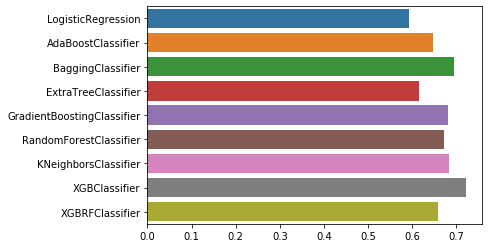

In [22]:
sns.barplot(model_performances, model_names)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,)

In [20]:
params = {'n_estimators':[900, 1100], 'learning_rate':[0.01,0.1,0.2,0.5]}

In [21]:
xgb = XGBClassifier(max_depth=10)

In [22]:
grid_xgb = GridSearchCV(xgb, param_grid=params, verbose=3)

In [23]:
grid_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] learning_rate=0.01, n_estimators=900 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[00:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, n_estimators=900, score=0.734, total=36.8min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 36.8min remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=900 ............................
[01:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [33]:
grid_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 500}

In [34]:
grid_xgb.best_score_

0.7309717958557176

In [49]:
grid_xgb.fit(x, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] learning_rate=0.001, max_depth=2, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[23:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=2, n_estimators=10, score=0.573, total=   1.6s
[CV] learning_rate=0.001, max_depth=2, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[23:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=2, n_estimators=10, score=0.573, total=   1.6s
[CV] learning_rate=0.001, max_depth=2, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[23:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=2, n_estimators=10, score=0.573, total=   1.7s
[CV] learning_rate=0.001, max_depth=2, n_estimators=50 ...............
[23:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [39]:
run_model(XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.2), data)

[20:44:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7328728711000914

In [40]:
ctr=6

In [41]:
def submission(model, ctr=ctr):
    model.fit(x, y)
    pred = model.predict(X)
    sub = pd.read_csv('submission_format.csv')
    sub['damage_grade'] = pred
    sub.to_csv("Sub_{}.csv".format(ctr), index_label=False)
    ctr+=1

In [56]:
x.shape, y.shape, X.shape

((260601, 49), (260601,), (86868, 49))

In [57]:
xgbc = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.2)


In [58]:
xgbc.fit(x,y)

[23:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [59]:
pred = xgbc.predict(X)

In [60]:
pred

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [62]:
sub = pd.read_csv('submission_format.csv')
sub['damage_grade'] = pred


In [65]:
sub.to_csv("Sub_6.csv", index=False)

In [42]:
submission(XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.2))

[18:19:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: Feature shape mismatch, expected: 48, got 86868

In [43]:
X

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,other_floor_type_x,position_s,position_t,plan_configuration_c,plan_configuration_d,plan_configuration_o,plan_configuration_s,plan_configuration_u,legal_ownership_status_v,legal_ownership_status_w
0,17,596,3,20,7,6,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,6,141,2,25,13,5,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,22,19,2,5,4,5,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,26,39,1,0,19,3,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,17,289,3,15,8,7,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3,70,20,6,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
86864,10,1407,3,25,6,7,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
86865,22,1136,1,50,3,3,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
86866,6,1041,2,5,9,5,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [44]:
x

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,other_floor_type_s,other_floor_type_x,position_s,plan_configuration_c,plan_configuration_d,plan_configuration_o,plan_configuration_s,plan_configuration_u,legal_ownership_status_v,legal_ownership_status_w
0,6,487,2,30,6,5,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,900,2,10,8,7,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,21,363,2,10,5,5,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,22,418,2,10,6,5,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0
4,11,131,3,30,8,9,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1,55,6,3,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
260597,17,715,2,0,6,5,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
260598,17,51,3,55,6,7,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
260599,26,39,2,10,14,6,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [45]:
x_test

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,other_floor_type_s,other_floor_type_x,position_s,plan_configuration_c,plan_configuration_d,plan_configuration_o,plan_configuration_s,plan_configuration_u,legal_ownership_status_v,legal_ownership_status_w
184797,6,673,2,40,7,6,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
224160,2,42,2,5,4,6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
170637,13,221,3,5,8,6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
208122,7,1188,1,5,4,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
52611,9,445,1,15,16,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130978,6,287,3,20,9,7,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
16501,25,286,2,15,20,5,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4282,6,724,1,0,3,3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
147816,8,217,2,35,6,6,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [55]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.13)
run_model(XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.2), [xtr,ytr,xte,yte])

[23:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7329023879099148

In [5]:
x.shape, y.shape

NameError: name 'x' is not defined

In [50]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test.head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,other_floor_type_x,position_s,position_t,plan_configuration_c,plan_configuration_d,plan_configuration_o,plan_configuration_s,plan_configuration_u,legal_ownership_status_v,legal_ownership_status_w
0,6,487,2,30,6,5,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,8,900,2,10,8,7,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,21,363,2,10,5,5,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
3,22,418,2,10,6,5,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
4,11,131,3,30,8,9,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1,55,6,3,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
260597,17,715,2,0,6,5,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
260598,17,51,3,55,6,7,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
260599,26,39,2,10,14,6,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [2]:
def find_n(arr, n):
    if len(arr) == 0:
        return False
    if arr[0] == n:
        return True
    return find_n(arr[1:], n)

In [4]:
find_n([1,2,3,4,5], 2)

True

In [7]:
x.shape, X.shape, y.shape

NameError: name 'x' is not defined

In [2]:
def check_sorted(l):
    if len(l) == 0:
        return True
    if min(l) != l[0]:
        return False
    return check_sorted(l[1:])

In [5]:
check_sorted([1,2,3,1])

False

In [6]:
def check_sorted_2(l, i=0):
    if i==len(l)-1:
        return True
    if l[i]>l[i+1]:
        return False
    return check_sorted_2(l, i+1)

In [9]:

check_sorted_2([1,2,3,4,1,10])

False

In [13]:
def sum_arr(arr):
    if len(arr)==0:
        return 0
    if len(arr) == 1:
        return arr[0]
    return arr[0] + sum_arr(arr[1:])

In [14]:
sum_arr([])

0

In [28]:
def sum_array(arr, n):
    if n == 0:
        return 0
    return arr[0] + sum_array(arr[1:], n-1)

In [29]:
sum_array([1,2,3],3)

6

In [26]:
def sumArray(arr,n):
    if n==0:
        return 0
    if n==1:
        return arr[0]
    return arr[] + sumArray(arr,n-1)

In [27]:
sumArray([1,2,3],3)

3